In [2]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [3]:
youtube_video = "https://wwww.youtube.com/watch?v=UF8uR6Z6KLc"

In [5]:
video_id = youtube_video.split("=")[1]

In [6]:
video_id

'UF8uR6Z6KLc'

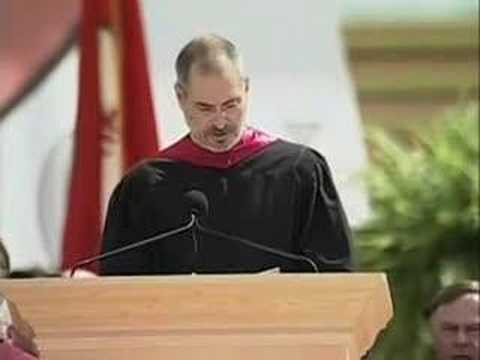

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [8]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [9]:
transcript[0:5]

[{'text': 'This program is brought to you by Stanford University.',
  'start': 7.47,
  'duration': 2.899},
 {'text': 'Please visit us at stanford.edu',
  'start': 10.47,
  'duration': 3.973},
 {'text': 'Thank You. I am honored to be with you today at your commencement',
  'start': 22.492,
  'duration': 7.527},
 {'text': 'from one of the finest universities in the world.',
  'start': 30.02,
  'duration': 2.718},
 {'text': 'Truth be told I never graduated from college',
  'start': 35.559,
  'duration': 6.0}]

In [10]:
result = " "
for i in transcript:
    result += ' ' + i['text']
print(len(result))

12133


In [11]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to t5-small and revision d769bba (https://huggingface.co/t5-small).
Using a pipeline without specifying a model name and revision in production is not recommended.
All model checkpoint layers were used when initializing TFT5ForConditionalGeneration.

All the layers of TFT5ForConditionalGeneration were initialized from the model checkpoint at t5-small.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.
c:\Users\Vishal Dhattarwal\anaconda3\lib\site-packages\transformers\models\t5\tokenization_t5_fast.py:156: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-small automatically truncating your i

In [12]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
    start = 0
    start = i * 1000
    end = (i + 1) * 1000
    out = summarizer(result[start:end])
    out = out[0]
    out = out['summary_text']
    summarized_text.append(out)
print(summarized_text)